In [3]:
from scipy.fft import fft, ifft
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hamming
import sounddevice as sd
from scipy.io.wavfile import write

In [4]:
def stdft(filename):
    
    data, fs = sf.read(filename)

    window_width = [10, 20, 50, 100]

    for i in range(0, len(window_width)):
        window_width[i] = int((window_width[i] * fs) / 1000)  #pretvori v sekunde

    for window in window_width:
        
        #kopiranje, ce je padding potrebno
        data_copy = data.copy()
        
        #pad, ce je potrebno
        while len(data_copy) % window != 0:
            data_copy = np.pad(data_copy, (0, 1)) #na koncu dodaj ničlo
    
        #brez prekrivanja, brez Hamminga

        Y = []

        for i in range(0, len(data_copy), window):
            
            section = data_copy[i:(i + window)]

            #izračunaj fft, vzemi samo pozitivne frekvence
            X = np.abs(fft(section))[:(int(window / 2))]

            Y.append(X)

        Y = np.asarray(Y).T
        
        #časovne in frekvenčne parametre za izris 
        time = np.linspace(0, int(len(data) / fs), len(Y))
        frequency = np.linspace(0, (fs / 2), len(Y[0]))

        plt.imshow(Y, aspect='auto', origin='lower', extent=[time[0], time[-1], frequency[0], frequency[-1]])
        plt.colorbar(label='Magnitude')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.ylim([0, 2500])
        plt.title(str("No overlap, no Hamming, " + str(window * 1000 / fs)))
        plt.show()
        
        #brez prekrivanja, Hamming
        
        hamming_window = hamming(window)

        Y = []

        for i in range(0, len(data_copy), window):
            
            section = data_copy[i:(i + window)] * hamming_window

            #izračunaj fft, vzemi samo pozitivne frekvence
            X = np.abs(fft(section))[:(int(window / 2))]

            Y.append(X)

        Y = np.asarray(Y).T

        #časovne in frekvenčne parametre za izris  
        time = np.linspace(0, int(len(data) / fs), len(Y))
        frequency = np.linspace(0, (fs / 2), len(Y[0]))

        plt.imshow(Y, aspect='auto', origin='lower', extent=[time[0], time[-1], frequency[0], frequency[-1]])
        plt.colorbar(label='Magnitude')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.title(str("No overlap, Hamming, " + str(window * 1000 / fs)))
        plt.show()
        
        #prekrivanje, brez Hamminga

        overlap = int(window / 2)
            
        #kopiranje, ce je padding potrebno
        data_copy2 = data.copy()
        
        #pad, ce je potrebno
        while len(data_copy2) % overlap != 0:
            data_copy2 = np.pad(data_copy2, (0, 1)) #add one zero at the end
        
        Y = []

        for i in range(0, len(data_copy2), overlap):
            
            section = data_copy2[i:(i + window)]

            #izračunaj fft, vzemi samo pozitivne frekvence
            X = np.abs(fft(section))[:(int(window / 2))]

            Y.append(X)

        Y = np.array(Y).T

        #časovne in frekvenčne parametre za izris  
        time = np.linspace(0, int(len(data) / fs), len(Y))
        frequency = np.linspace(0, (fs / 2), len(Y[0]))

        plt.imshow(Y, aspect='auto', origin='lower', extent=[time[0], time[-1], frequency[0], frequency[-1]])
        plt.colorbar(label='Magnitude')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.title(str("Overlap, no Hamming, " + str(window * 1000 / fs)))
        plt.show()
    
        #prekrivanje, Hammming
        
        Y = []

        for i in range(0, len(data_copy2) - window + 1, overlap):
            
            section = data_copy2[i:(i + window)] * hamming_window

            #izračunaj fft, vzemi samo pozitivne frekvence
            X = np.abs(fft(section))[:(int(window / 2))]

            Y.append(X)

        Y = np.asarray(Y).T

        #časovne in frekvenčne parametre za izris
        time = np.linspace(0, int(len(data) / fs), len(Y))
        frequency = np.linspace(0, (fs / 2), len(Y[0]))

        plt.imshow(Y, aspect='auto', origin='lower', extent=[time[0], time[-1], frequency[0], frequency[-1]])
        plt.colorbar(label='Magnitude')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.title("Overlap, Hamming, " + str(window * 1000 / fs))
        plt.show()
        

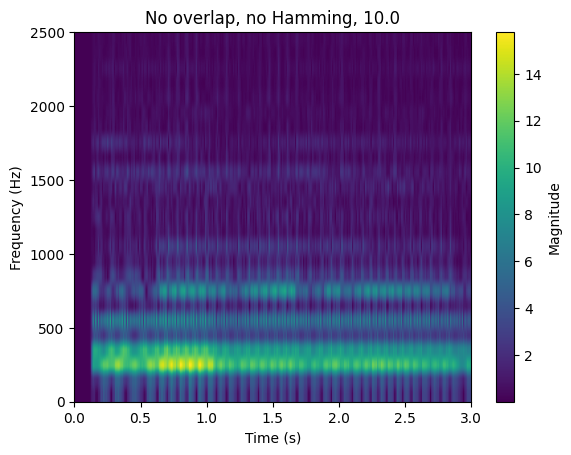

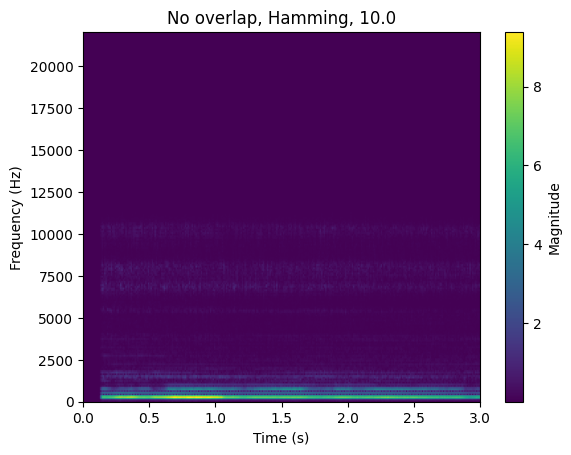

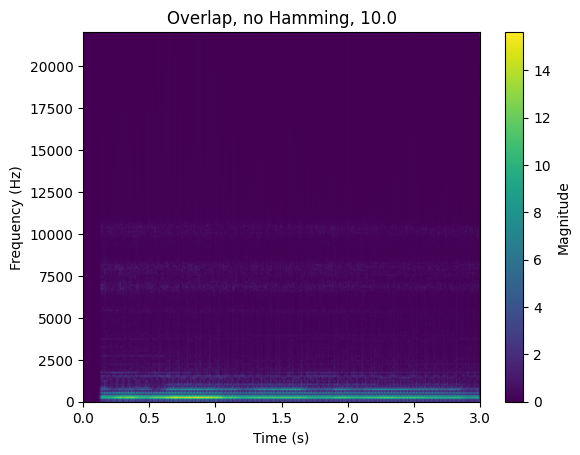

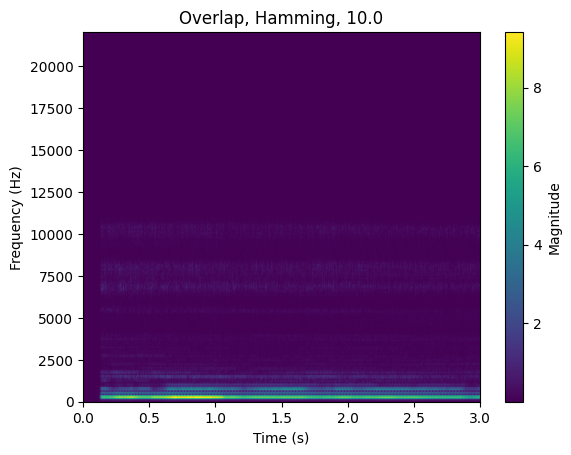

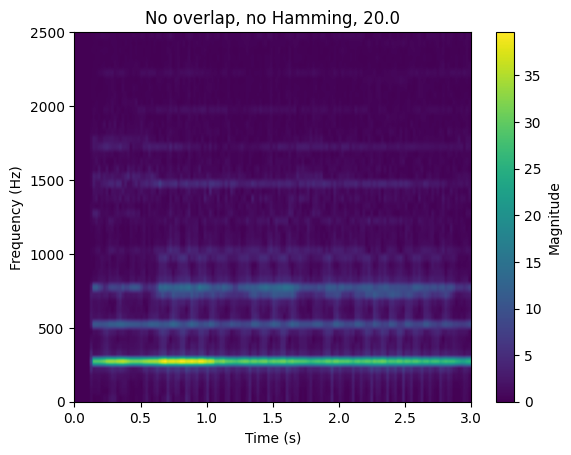

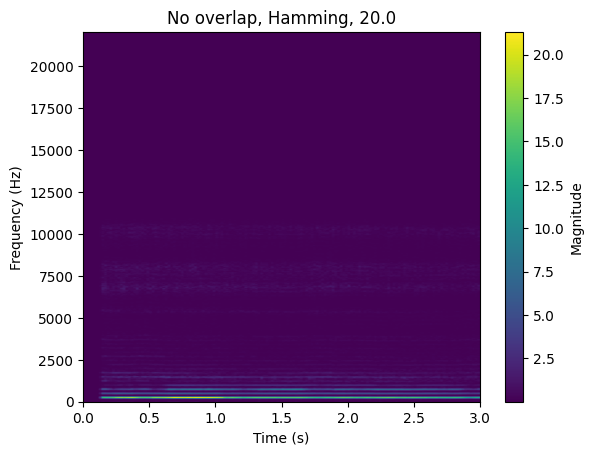

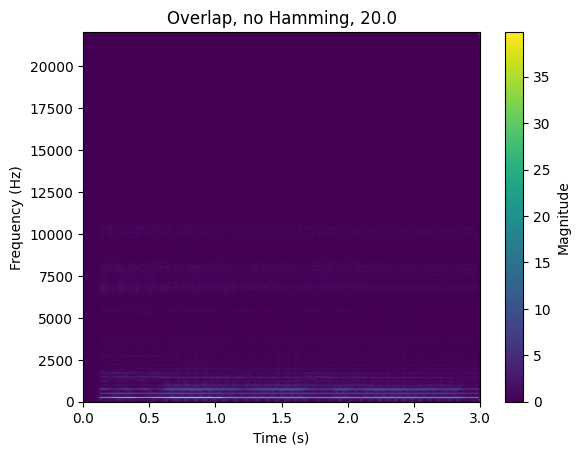

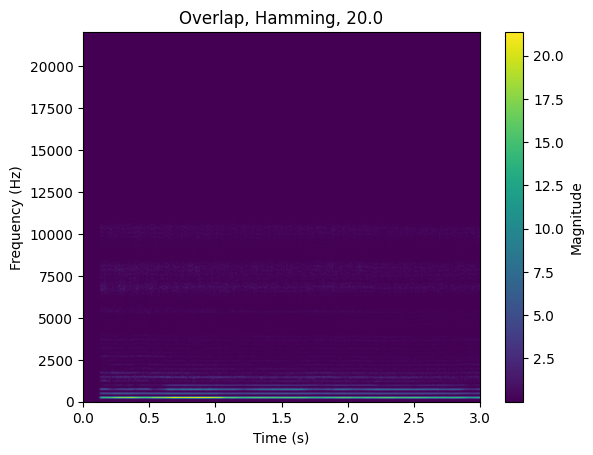

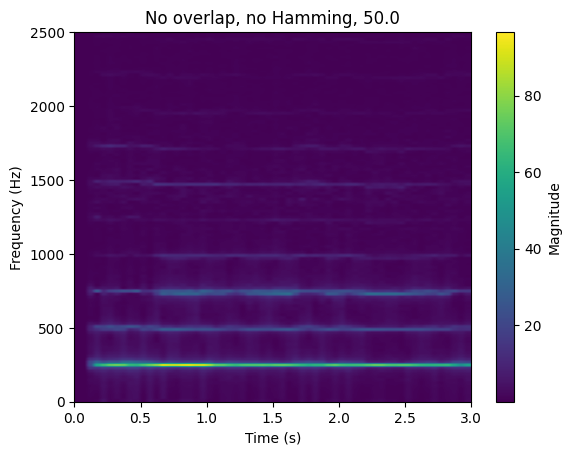

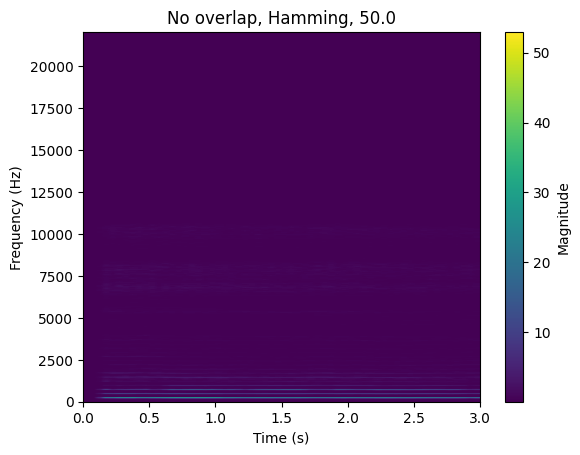

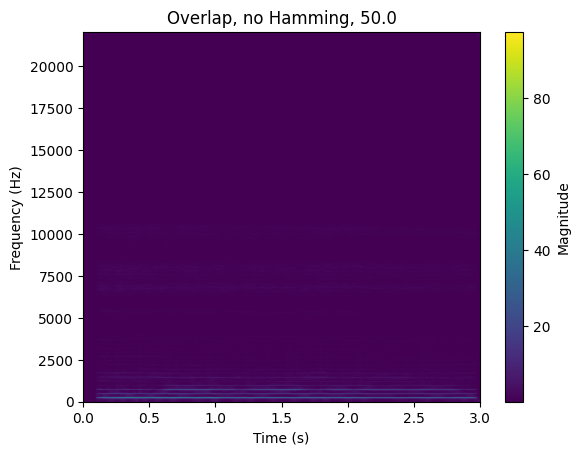

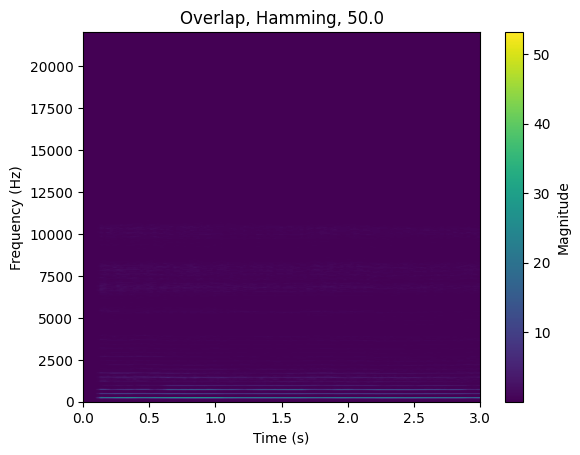

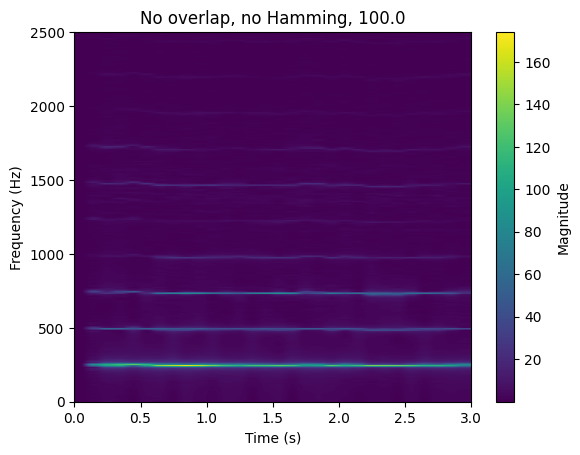

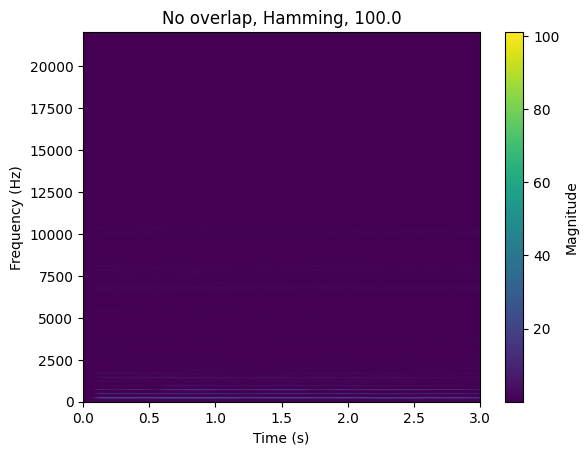

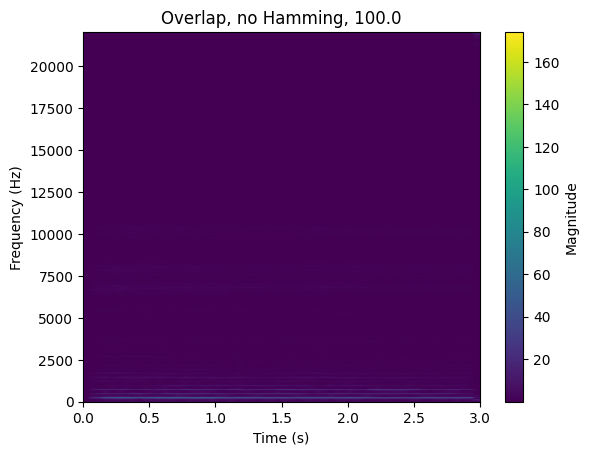

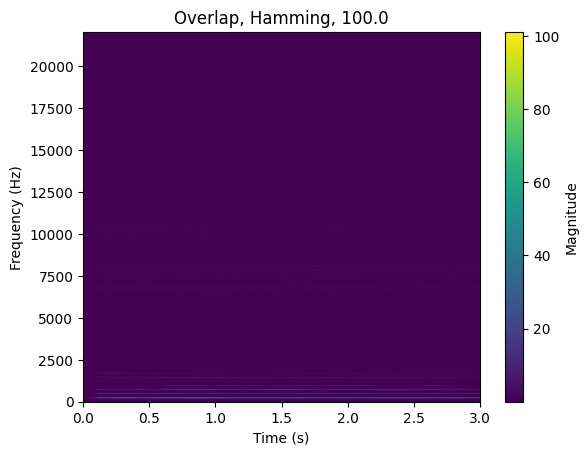

In [5]:
stdft("a.wav")

In [13]:
# stdft("e.wav")

In [14]:
# stdft("i.wav")

In [15]:
# stdft("o.wav")

In [16]:
# stdft("u.wav")

In [17]:
# stdft("r.wav")

In [18]:
# stdft("mama.wav")

In [19]:
# stdft("eva_in_olu.wav")

In [20]:
# def record(filename):
#     recording = sd.rec(int(3 * 44100), samplerate=44100, channels=1)
#     sd.wait()  # čakaj, dokler se snemanje ne konča
#     write(filename, 44100, recording)

# record("eva_in_olu_faster.wav")
# stdft("eva_in_olu_faster.wav")

In [ ]:
#V zadnjem primeru je zelo zanimivo videti, kako lahko hitrost izgovorjave vpliva na spektrogram signala. 
#Tu lahko vidimo, da morajo biti okna manjša, da bi zajeli frekvenčno sliko iz prejšnje slike, prekrivanje 
#med njimi pa mora biti večje.
#Pri krajšem časovnem intervalu so višje harmonske bolj zmešane, pri daljšem pa lahko vidimo jasnejše in 
#natančnejšo črto na frekvenci, ki jo predstavlja.